In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [3]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [4]:
visits.info()
visits.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
70156,desktop,2018-03-29 18:23:00,2,2018-03-29 18:18:00,13276101185449595603
327534,desktop,2017-06-30 13:53:00,5,2017-06-30 13:50:00,16201258679117849274
256943,desktop,2017-08-07 21:54:00,9,2017-08-07 21:31:00,6266557536916812163
52820,desktop,2018-03-12 15:00:00,2,2018-03-12 14:48:00,12869801667763685675
358577,desktop,2017-12-25 14:41:19,4,2017-12-25 14:41:00,1056247910853326627


In [5]:
orders.info()
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
4722,2017-08-01 08:30:00,9.78,8292958189619466375
31225,2018-01-26 19:33:00,14.67,18020550320433720087
1796,2017-06-22 16:53:00,1.83,15786417636454154939
17742,2017-11-16 09:36:00,1.95,9591062695509218952
1821,2017-06-22 22:54:00,1.59,14537232286393565858


In [6]:
costs.info()
costs.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
1750,5,2018-03-26,241.36
420,2,2017-07-28,59.86
900,3,2017-11-22,508.41
1731,5,2018-03-07,169.37
45,1,2017-07-16,34.02


Функция для приведения имен к нижнему регистру и замены имен столбцов.

In [7]:
def replace_columns_names(data):
    list_of_columns = []
    for column in data.columns:
        column = column.lower()
        column = column.replace(' ', '_')
        list_of_columns.append(column)
    data.columns = list_of_columns
    return data

<b>Visits</b>  
Изменим названия столбцов,  
Переведем столбцы с датой к нужному типу.

In [8]:
visits = replace_columns_names(visits)
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

<b>Orders</b>  
Изменим названия столбцов,  
Переведем столбцы с датой к нужному типу.

In [9]:
orders = replace_columns_names(orders)
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

<b>Costs</b>  
Изменим названия столбцов,  
Переведем столбцы с датой к нужному типу.

In [10]:
costs = replace_columns_names(costs)
costs['dt'] = pd.to_datetime(costs['dt'])

<b>Отчеты и метрики</b>  
<b>Сколько людей пользуются в день, неделю, месяц?</b>

In [11]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['start_ts_day'] = visits['start_ts'].dt.date
visits['start_ts_week'] = pd.DatetimeIndex(visits['start_ts']).week
visits['start_ts_month'] = pd.DatetimeIndex(visits['start_ts']).month
visits['start_ts_year'] = pd.DatetimeIndex(visits['start_ts']).year

dau = visits.groupby(['start_ts_day']).agg({'uid':'nunique'}).mean()
wau = visits.groupby(['start_ts_year', 'start_ts_week']).agg({'uid':'nunique'}).mean()
mau = visits.groupby(['start_ts_year', 'start_ts_month']).agg({'uid':'nunique'}).mean()
print('В день сервисом в среднем пользуются {} людей'.format(int(dau)))
print('В неделю сервисом в среднем пользуются {} людей'.format(int(wau)))
print('В месяц сервисом в среднем пользуются {} людей'.format(int(mau)))

sticky_wau = dau / wau
sticky_mau = dau / mau
print('Недельная вовлеченность аудитории: {:.2%}'.format(sticky_wau[0]))
print('Месячная вовлеченность аудитории: {:.2%}'.format(sticky_mau[0]))

В день сервисом в среднем пользуются 907 людей
В неделю сервисом в среднем пользуются 5716 людей
В месяц сервисом в среднем пользуются 23228 людей
Недельная вовлеченность аудитории: 15.88%
Месячная вовлеченность аудитории: 3.91%


<b>Сколько сессий в день?</b>

In [12]:
day_visits = visits.groupby(['start_ts_day']).agg({'uid':'count'})
print('В день в среднем проходит {} сессий'.format(int(day_visits.mean()[0])))

В день в среднем проходит 987 сессий


In [13]:
session_user = day_visits/dau
print(session_user.mean())

uid    1.087414
dtype: float64


<b>Сколько длится одна сессия?</b>

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


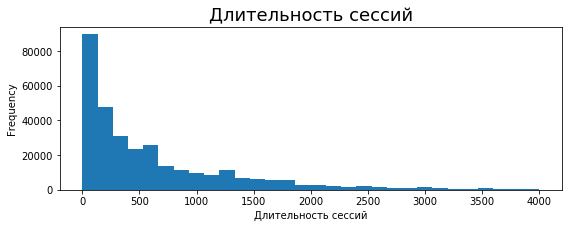

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: duration, dtype: float64
Одна сессия длится в среднем 60 секунд


In [14]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
mean_session = visits[visits['duration'] != '0 seconds']['duration'].mode()
durations_of_visits = visits[visits['duration'] != 0]['duration']
durations_of_visits.plot(kind = 'hist', bins = 30, figsize = (9,3), range = (0, 4000))
plt.title('Длительность сессий', fontsize=18)
plt.xlabel('Длительность сессий')
plt.show()
print(durations_of_visits.describe())
print('Одна сессия длится в среднем {} секунд'.format(mean_session[0]))

<b>Как часто люди возвращаются?</b>

In [15]:
sessions_per_user = len(visits) / len(visits['uid'].unique())

Люди достаточно редко пользуются сервисом.  
Посмотрим Retention Rate, чтобы увидеть как часто возвращаются в рамках когорт.

Активность пользователей

In [16]:
first_activity = visits.groupby('uid').agg({'start_ts':'min'})
first_activity.columns = ['first_activity']
visits = visits.join(first_activity, on='uid')

In [17]:
visits_new = visits[['uid', 'first_activity', 'start_ts']]
visits_new['first_activity_month'] = visits_new['first_activity'].astype('datetime64[M]')
visits_new['start_ts_month'] = visits_new['start_ts'].astype('datetime64[M]')
visits_new['lifetime'] = ((visits_new['start_ts_month'] - visits_new['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohorts_visits = visits_new.groupby(['first_activity_month', 'lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts_visits[cohorts_visits['lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count.columns = ['first_activity_month', 'cohort_users']
initial_users_count = initial_users_count.set_index('first_activity_month')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [18]:
cohorts_visits = cohorts_visits.join(initial_users_count, on = 'first_activity_month')

In [19]:
cohorts_visits['retention'] = cohorts_visits['uid'] / cohorts_visits['cohort_users']
retention_pivot = cohorts_visits.pivot_table(index='first_activity_month',
                                      columns='lifetime',
                                      values='retention',
                                      aggfunc='sum')
retention_pivot = retention_pivot.reset_index()
retention_pivot['first_activity_month'] = retention_pivot['first_activity_month'].dt.strftime('%Y-%m')
retention_pivot = retention_pivot.set_index('first_activity_month')
retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


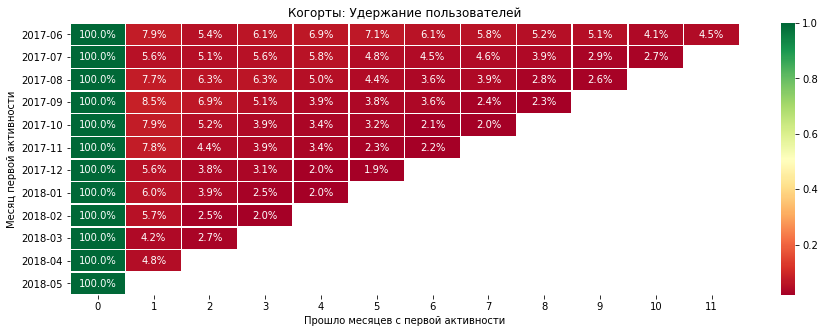

In [20]:
plt.figure(figsize=(15, 5))
plt.title('Когорты: Удержание пользователей')
sns.heatmap(retention_pivot, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.ylabel('Месяц первой активности')
plt.xlabel('Прошло месяцев с первой активности')
plt.show()

<div class="alert alert-info">Начиная с сентябрьской когорты Retention Rate постепенно убывает по когортам с течением времени. Если для когорты пользователей, пришедших в сентябре Retention Rate составляет 8,5%, то для пользователей, пришедших в марте уже в два раза меньше - 4,2%. В первой когорте пользователи удерживались лучше всего, на 12 месяце жизни когорты показатель 4,5 - это больше, чем на старте мартовской когорты. С каждой новой когортой поведение покупателей меняется.</div>

In [21]:
retention_pivot_mean = cohorts_visits.pivot_table(index='first_activity_month',
                                      columns='lifetime',
                                      values='retention',
                                      aggfunc='mean')
retention_pivot_mean

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Новые пользователи по месяцам</b>

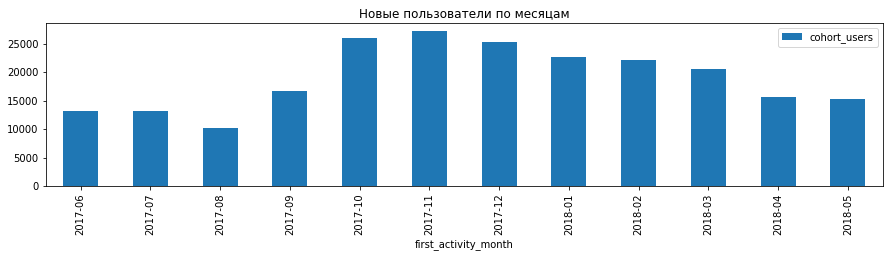

In [22]:
cohorts_visits['first_activity_month'] = cohorts_visits['first_activity_month'].dt.strftime('%Y-%m')
cohorts_visits = cohorts_visits.set_index('first_activity_month')
new_users_by_month = cohorts_visits[cohorts_visits['lifetime'] == 0][['cohort_users']]
new_users_by_month.plot(kind = 'bar', figsize = (15,3), title = 'Новые пользователи по месяцам')
plt.show()

<div class="alert alert-info"> График показывает, в какой когорте приходят новые пользователи. Здесь видим, что новые пользователи активизируются осенью, а пик приходится на ноябрь-декабрь. В принципе, это логично. Летом все в отпусках и тратят деньги на курортах. Как раз ближе к Новому году начинаются основные покупки. </div>

<b>ПРОДАЖИ  
Когда люди начинают покупать?</b>

Найдем время и дату первой сессии  
Найдем время первой покупки  
Добавим дату и время первой сессии в информацию по первым заказам

In [23]:
first_sessions = visits.groupby(['uid']).agg({'start_ts':'min', 'source_id':'first'})
first_sessions.columns = ['first_activity', 'first_source']
first_orders = orders.groupby(['uid']).agg({'buy_ts':'min'})
first_orders.columns = ['first_buy_ts']
first_orders = first_orders.join(first_sessions,on='uid')

Найдем время, прощедщее с момента первой сессии до первой покупки

Медиана времени с первой сессии до первой покупки: 16 минут
Среднее время с первой сессии до первой покупки: 16 дней
Мода времени с первой сессии до первой покупки: 1 минута


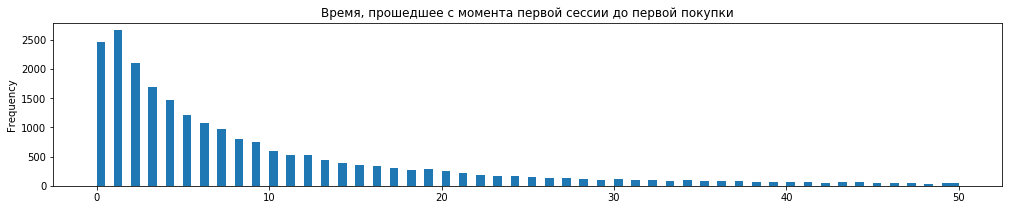

In [24]:
first_orders['time_to_first_purchase'] = (first_orders['first_buy_ts'] - first_orders['first_activity']) / np.timedelta64(1, 'm')
first_orders['time_to_first_purchase'].plot(kind = 'hist', bins = 100, range = (0,50), figsize = (17,3), title = 'Время, прошедшее с момента первой сессии до первой покупки')
print('Медиана времени с первой сессии до первой покупки: {} минут'.format(int(first_orders['time_to_first_purchase'].median())))
print('Среднее время с первой сессии до первой покупки: {} дней'.format(int(first_orders['time_to_first_purchase'].mean()/60/24)))
print('Мода времени с первой сессии до первой покупки: {} минута'.format(int(first_orders['time_to_first_purchase'].mode())))

<div class="alert alert-info"> Большая часть значений распределяется в промежутке от 0 до 10 , то есть большей части пользователей нужно менее 10 мин, чтобы совершить покупку. При этом есть доля пользователей, которым на принятие решения необходимы сутки.  
Лучше всего характеризует распределение мода</div>

Сколько раз покупают за период?

Добавим дату первого заказа и выведем в отдельный столбец месяц первого заказа.

In [25]:
orders = orders.join(first_orders, on='uid')
orders['first_buy_month'] = orders['first_buy_ts'].astype('datetime64[M]')
orders['first_session_month'] = orders['first_activity'].astype('datetime64[M]')
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [26]:
orders['buy_date'] = orders['buy_ts'].dt.date
orders['buy_week'] = orders['buy_ts'].dt.week
orders['buy_year'] = orders['buy_ts'].dt.year
day_purchases_per_user = orders.groupby(['buy_date', 'uid']).agg({'buy_ts':'count'}).mean()[0]
week_purchases_per_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'buy_ts':'count'}).mean()[0]
month_purchases_per_user = orders.groupby(['buy_month', 'uid']).agg({'buy_ts':'count'}).mean()[0]
year_purchases_per_user = orders.groupby(['buy_year', 'uid']).agg({'buy_ts':'count'}).mean()[0]
print('''В среднем на одного пользователя покупок:
В день - {:.2f},
В неделю - {:.2f},
В месяц - {:.2f},
В год - {:.2f}
'''.format(day_purchases_per_user, week_purchases_per_user, month_purchases_per_user, year_purchases_per_user))

В среднем на одного пользователя покупок:
В день - 1.08,
В неделю - 1.16,
В месяц - 1.23,
В год - 1.32



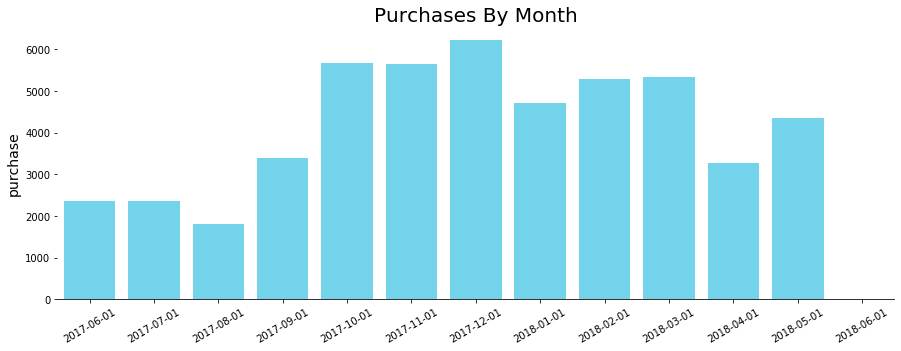

In [28]:
month_buy = orders.groupby('buy_month')['buy_ts'].count().reset_index()
month_buy['buy_month'] = month_buy['buy_month'].astype('str')

plt.figure(figsize=(15, 5))
plt.title('Purchases By Month', fontsize=20)
sns.barplot(x='buy_month', y='buy_ts', data=month_buy, color="#5edfff", label="line")
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('purchase', fontsize=14)
plt.xticks(rotation=30)
plt.show()

<div class="alert alert-info">Количество покупок растет с сентября по май, и снижается в летний период. Активнее всего покупают в осенне-зимний период. </div>

Покупок мало, сделаем когортный анализ по количеству покупок на человека.

- Посчитаем lifetime заказов  
- Сгруппируем заказы по когортам и lifetime и высчитаем кол-во покупок и пользователей  
- Получим количество заказов на одного пользователя по каждой когорте и кадлому lifetime  
- Создадим сводную таблицу с когортным анализом количества заказов на пользователя

In [29]:
orders = orders[['uid', 'revenue', 'buy_ts', 'buy_month', 'first_buy_ts', 'first_buy_month', 'first_session_month']]
orders['lifetime_fa_b'] = ((orders['buy_month'] - orders['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')
orders_grouped_by_cohorts = orders.groupby(['first_session_month', 'lifetime_fa_b']).agg({'uid':['count', 'nunique']}).reset_index()
orders_grouped_by_cohorts.columns = ['first_session_month', 'lifetime_fa_b', 'n_orders', 'n_users']
orders_grouped_by_cohorts['orders_per_user'] = orders_grouped_by_cohorts['n_orders'] / orders_grouped_by_cohorts['n_users']
orders_grouped_by_cohorts['first_session_month'] = orders_grouped_by_cohorts['first_session_month'].dt.strftime('%Y-%m')
cohorts = orders_grouped_by_cohorts.pivot_table(index = 'first_session_month', columns = 'lifetime_fa_b', values = 'orders_per_user', aggfunc = 'mean')
cohorts['mean'] = cohorts.mean(axis=1)

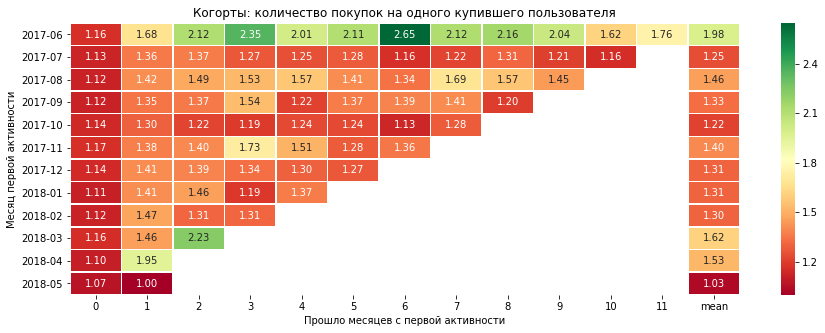

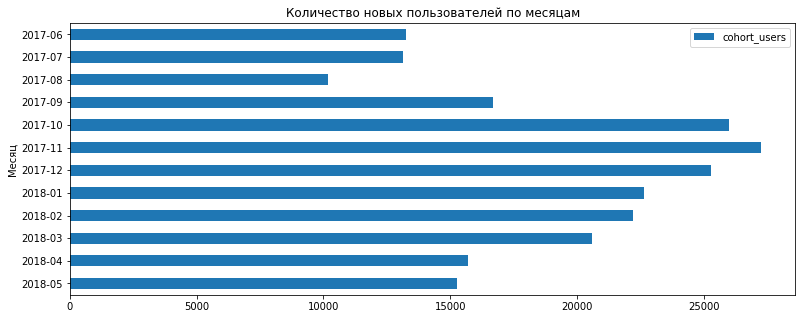

In [30]:
plt.figure(figsize=(15, 5))
plt.title('Когорты: количество покупок на одного купившего пользователя')
sns.heatmap(cohorts, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности')
plt.show()
new_users_by_month = new_users_by_month.reset_index()
new_users_by_month = new_users_by_month.sort_values(by= 'first_activity_month', ascending = False)
new_users_by_month = new_users_by_month.set_index('first_activity_month')
new_users_by_month.plot(kind = 'barh', figsize = (13,5), title = 'Количество новых пользователей по месяцам')
plt.ylabel('Месяц')
plt.show()

Видим странную картину - именно в тех когортах, где количество новых пользователей самое большое, мы имеем меньшее количество покупок на 1 пользователя . 

Сделаем когортный анализ и посмотрим сколько пользователей делают покупки по истечению времени, когорты сформируем по времени первой активности, жизнь когорты будем смотреть с первой активности до покупки

In [31]:
orders['first_session_month'] = orders['first_session_month'].dt.strftime('%Y-%m')

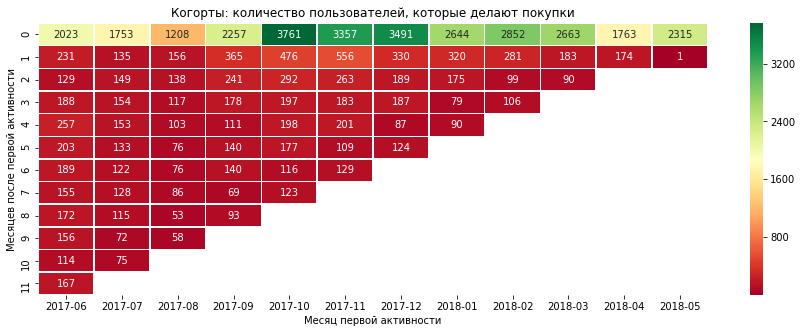

In [32]:
cohorts_buy_n_users = orders.pivot_table(index = 'lifetime_fa_b', columns = 'first_session_month', values = 'uid', aggfunc = 'nunique')
plt.figure(figsize=(15, 5))
plt.title('Когорты: количество пользователей, которые делают покупки')
sns.heatmap(cohorts_buy_n_users, annot=True, fmt=".0f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Месяц первой активности')
plt.ylabel('Месяцев после первой активности')
plt.show()

<div class="alert alert-info"> Видим, что в первой когорте больше всего покупок. </div>

В месяц в среднем покупок на одного пользователя 1.22
В месяц в среднем ВСЕГО покупок 4201


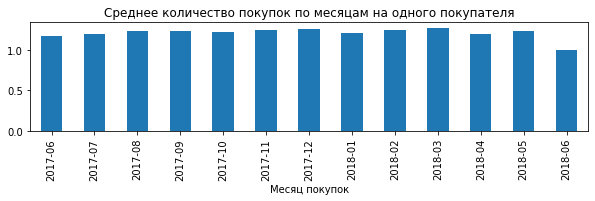

In [33]:
orders_per_user = orders.groupby(['buy_month']).agg({'uid':['count', 'nunique']}).reset_index()
orders_per_user.columns = ['buy_month', 'n_orders', 'n_users']
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_users']
print('В месяц в среднем покупок на одного пользователя {:.2f}'.format(orders_per_user['orders_per_user'][:-1].mean()))
print('В месяц в среднем ВСЕГО покупок {:.0f}'.format(orders.groupby('buy_month').agg({'uid':'count'})[:-1].mean()[0]))
orders_per_user['buy_month'] = orders_per_user['buy_month'].dt.strftime('%Y-%m')
orders_per_user = orders_per_user.set_index('buy_month')

plt.figure(figsize=(10,2))
orders_per_user['orders_per_user'].plot(kind = 'bar', title = 'Среднее количество покупок по месяцам на одного покупателя')
plt.xlabel('Месяц покупок')
plt.show()

<div class="alert alert-info"> График показывает среднее число покупок на пользователя. Получается, что аудитория у нас меняется со временем, а среднее количество покупок на 1 пользователя практически не меняется. Ощущение, что покупки совершают только постоянные пользователи. А новопривлеченные - "пришли, посмотрели и ушли". Вопрос к маркетологам. </div>

<b>Какой средний чек?</b>

- Сгруппируем заказы по когортам и lifetime и суммам покупок на одного пользователя  
- Создадим сводную таблицу с когортным анализом суммы покупок на пользователя

Средний чек равен 5.00 у.е.


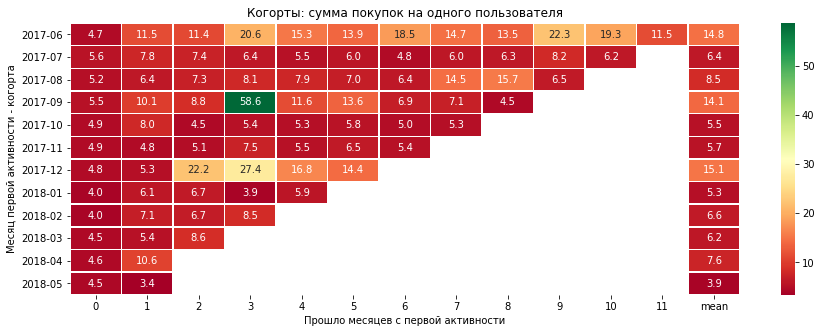

In [36]:
orders_grouped_by_cohorts = orders.groupby(['first_session_month', 'lifetime_fa_b']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts.columns = ['first_session_month', 'lifetime_fa_b', 'revenue_total', 'n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue_total'] / orders_grouped_by_cohorts['n_users']
cohorts_revenue_per_user = orders_grouped_by_cohorts.pivot_table(index = 'first_session_month', columns = 'lifetime_fa_b', values = 'revenue_per_user', aggfunc = 'mean')
cohorts_revenue_per_user['mean'] = cohorts_revenue_per_user.mean(axis=1)
plt.figure(figsize=(15, 5))
plt.title('Когорты: сумма покупок на одного пользователя')
sns.heatmap(cohorts_revenue_per_user, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности - когорта')
print('Средний чек равен {:.2f} у.е.'.format(orders['revenue'].mean()))

<div class="alert alert-info"> Лучше всего ситуация обстоит в когортах: июньская, сентябрьская и декабрьская, средний чек больше 14. Они выбиваются в лидеры. А в остальных, средний чек около 6-7 </div>

Далее мы делаем когортный анализ по среднему чеку, но подразумеваем сумму покупок на одного клиента за период - в нашем случае по месяцам.

<b>Сколько денег приносят? LTV</b>

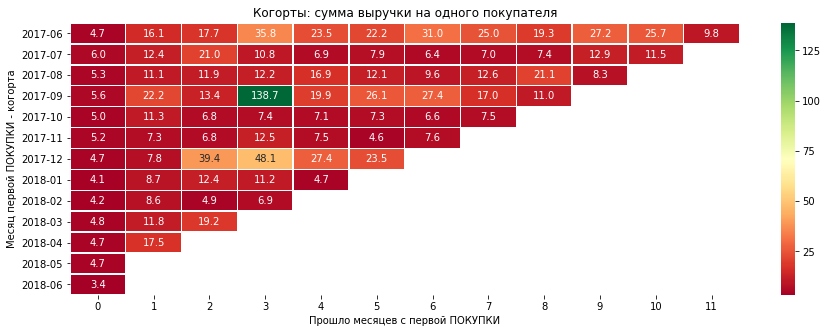

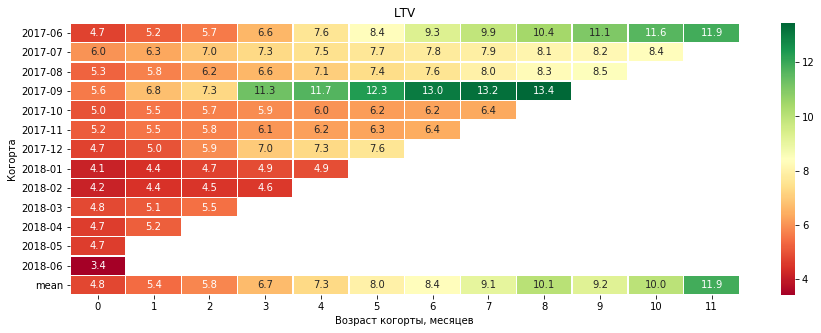

In [37]:
orders['age_cohort'] = ((orders['buy_month'] - orders['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohort_sizes_ltv = orders.groupby('first_buy_month').agg({'uid':'nunique'})
cohort_sizes_ltv.columns = ['cohort_size']
orders_grouped_by_cohorts_ltv = orders.groupby(['first_buy_month', 'age_cohort']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(cohort_sizes_ltv, on='first_buy_month')
orders_grouped_by_cohorts_ltv['ltv'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv['revenue_per_user'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['uid']

cohorts_revenue_per_user_2 = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'revenue_per_user', aggfunc='mean').reset_index()
cohorts_revenue_per_user_2['first_buy_month'] = cohorts_revenue_per_user_2['first_buy_month'].dt.strftime('%Y-%m')
cohorts_revenue_per_user_2 = cohorts_revenue_per_user_2.set_index('first_buy_month')
plt.figure(figsize=(15, 5))
plt.title('Когорты: сумма выручки на одного покупателя')
sns.heatmap(cohorts_revenue_per_user_2, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Прошло месяцев с первой ПОКУПКИ')
plt.ylabel('Месяц первой ПОКУПКИ - когорта')
plt.show()

ltv = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'ltv', aggfunc = 'mean')
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv

plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

<div class="alert alert-info">Можно отметить, что 1ая когорта самая стабильная - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт. Вызвано это тем, что именно эта когорта показывает лучший показатель Retention - как относительный, так и абсолютный.
По 4ой когорте (сентябрьской) необходимо исследовать 3ий месяц её жизни - там у нас аномальный всплеск месячного значения LTV.<div> 

<b>МАРКЕТИНГ  
Сколько потратили денег?</b>

Всего потрачено на маркетинг 329131.62 $

Всего потрачено на каждый из источников


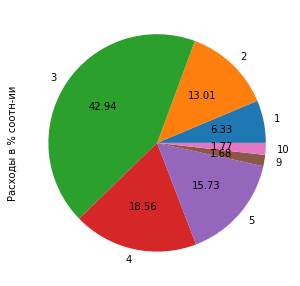

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


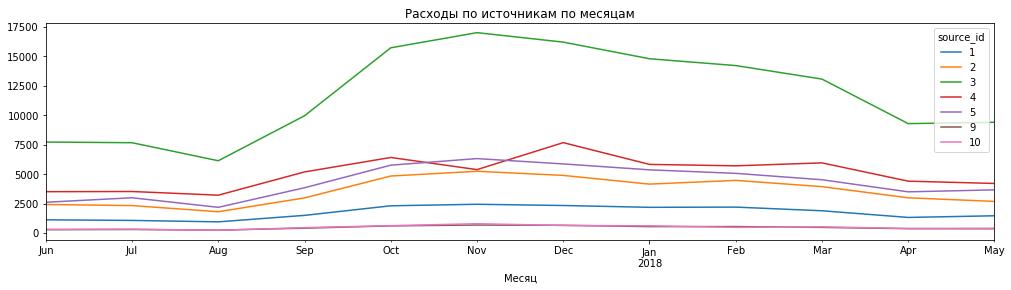

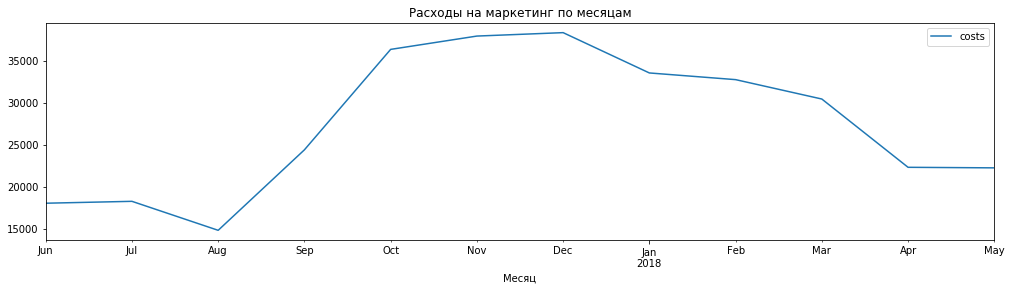

In [38]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
print('Всего потрачено на маркетинг {} $'.format(costs['costs'].sum()))
print('\nВсего потрачено на каждый из источников')
costs.groupby('source_id').sum().plot(y = 'costs', autopct='%.2f', kind = 'pie', figsize = (5, 5), legend = False)
plt.ylabel('Расходы в % соотн-ии')
plt.show()
print(costs.groupby('source_id').sum())

costs_pivot = costs.pivot_table(index = 'cost_month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(figsize = (17,4), title = 'Расходы по источникам по месяцам')
plt.xlabel('Месяц')
plt.show()

costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').plot(title = 'Расходы на маркетинг по месяцам', figsize = (17,4))
plt.xlabel('Месяц')
plt.show()

Сколько стоило привлечение одного покупателя из каждого источника?

In [39]:
print('Кол-во пользователей приходивших в сервис по разному кол-ву источников:')
print(visits.groupby('uid').agg({'source_id':'nunique'})['source_id'].value_counts())

visits_sources_none = visits[['uid', 'start_ts', 'end_ts', 'first_activity', 'source_id']]
visits_sources_none = visits_sources_none.join(first_orders[['first_buy_ts']], on='uid')

Кол-во пользователей приходивших в сервис по разному кол-ву источников:
1    190449
2     28642
3      6792
4      1761
5       442
6        74
7         9
Name: source_id, dtype: int64


Напишем функцию проверки сессий на факт покупки  
Найдем сессии в которые совершили покупки

In [40]:
def what_session(row):
    if row['start_ts']<=row['first_buy_ts']<=row['end_ts']:
        return True
    else:
        return False

visits_sources_none['buy_session'] = visits_sources_none.apply(what_session, axis = 1)

In [41]:
def before_first_purchase(row):
    if row['start_ts'] <= row['first_buy_ts']:
        return True
    else:
        return False
visits_sources_none['before_first_purchase'] = visits_sources_none.apply(before_first_purchase, axis = 1)

<div class="alert alert-info">Посмотрим какие и на сколько источники рекламы повлияли на пользователей до и во время покупки.<div>

In [62]:
visits_before_first_purchase = visits_sources_none[(visits_sources_none['before_first_purchase'] == True)&(visits_sources_none['buy_session'] == False)]
sources_before_first_purchase = visits_before_first_purchase.pivot_table(index = 'uid', columns = 'source_id', values = 'before_first_purchase', aggfunc = 'sum')
sources_before_first_purchase['sessions_before_first_purchase'] = sources_before_first_purchase.sum(axis = 1)
sessions_per_user = session_user.mean()

print('Сессий на 1 пользователя перед покупкой: {:.2f}'.format(sources_before_first_purchase['sessions_before_first_purchase'].mean()))
print('Всего сессий на 1 пользователя: {:.2f}'.format(session_user.mean())
sources_before_first_purchase = sources_before_first_purchase.fillna(0)
sources_before_first_purchase = sources_before_first_purchase.astype('int')

for i in range(1,11):
    try:
        print('Источник source-{} - до первой покупки используется {:.1%} пользователями'.format(i, sources_before_first_purchase[i].mean()))
    except:
            print('Источник source-{} - до первой покупки используется 0.0% пользователями'.format(i))

SyntaxError: invalid syntax (<ipython-input-62-cf7646cdba82>, line 8)

In [46]:
visits_purchase = visits_sources_none[visits_sources_none['buy_session'] == True]
sources_first_purchase = visits_purchase.pivot_table(index = 'uid', columns = 'source_id', values = 'before_first_purchase', aggfunc = 'sum')
sources_first_purchase = sources_first_purchase.fillna(0)
sources_first_purchase = sources_first_purchase.astype('int')

for i in range(1,11):
    try:
        print('Источник source-{} - во время покупки используется {:.1%} пользователями'.format(i, sources_first_purchase[i].mean()))
    except:
            print('Источник source-{} - во время покупки используется 0.0% пользователями'.format(i))

Источник source-1 - во время покупки используется 12.6% пользователями
Источник source-2 - во время покупки используется 10.5% пользователями
Источник source-3 - во время покупки используется 24.6% пользователями
Источник source-4 - во время покупки используется 26.1% пользователями
Источник source-5 - во время покупки используется 20.6% пользователями
Источник source-6 - во время покупки используется 0.0% пользователями
Источник source-7 - во время покупки используется 0.0% пользователями
Источник source-8 - во время покупки используется 0.0% пользователями
Источник source-9 - во время покупки используется 2.0% пользователями
Источник source-10 - во время покупки используется 3.6% пользователями


In [47]:
sources_all_visits = visits_sources_none.pivot_table(index = 'uid', columns = 'source_id', values = 'start_ts', aggfunc = 'count')
sources_all_visits = sources_all_visits.fillna(0)
sources_all_visits = sources_all_visits.astype('int')

for i in range(1,11):
    try:
        print('Источник source_{} - используется {:.1%} пользователями'.format(i, sources_all_visits[i].mean()))
    except:
            print('Источник source_{} - используется 0.0% пользователями'.format(i))

Источник source_1 - используется 15.0% пользователями
Источник source_2 - используется 20.9% пользователями
Источник source_3 - используется 37.5% пользователями
Источник source_4 - используется 44.6% пользователями
Источник source_5 - используется 29.3% пользователями
Источник source_6 - используется 0.0% пользователями
Источник source_7 - используется 0.0% пользователями
Источник source_8 - используется 0.0% пользователями
Источник source_9 - используется 5.8% пользователями
Источник source_10 - используется 4.4% пользователями


<div class="alert alert-info"> Здесь попытка выяснить, сколько (в процентах) пользователей решило совершить покупку, воспользовашись тем или иный источником. <div>

In [48]:
visits_sources_none['ts_month'] = visits_sources_none['start_ts'].astype('datetime64[M]')
visits_to_first_purchase = visits_sources_none[visits_sources_none['before_first_purchase'] == True]
visits_to_first_purchase_pivot = visits_to_first_purchase.pivot_table(index = 'ts_month', columns = 'source_id', values = 'start_ts', aggfunc = 'count')
visits_to_first_purchase_pivot['visits_to_purchase'] = visits_to_first_purchase_pivot.sum(axis = 1)
visits_to_first_purchase_pivot
for i in range(1,11):
    try:
        visits_to_first_purchase_pivot[i] = visits_to_first_purchase_pivot[i] / visits_to_first_purchase_pivot['visits_to_purchase']
    except:
        0

In [49]:
visits_to_first_purchase_pivot = visits_to_first_purchase_pivot[[1, 2, 3, 4, 5, 9, 10]].round(2).reset_index()
visits_to_first_purchase_pivot['ts_month'] = visits_to_first_purchase_pivot['ts_month'].dt.strftime('%Y-%m')
visits_to_first_purchase_pivot = visits_to_first_purchase_pivot.set_index('ts_month')

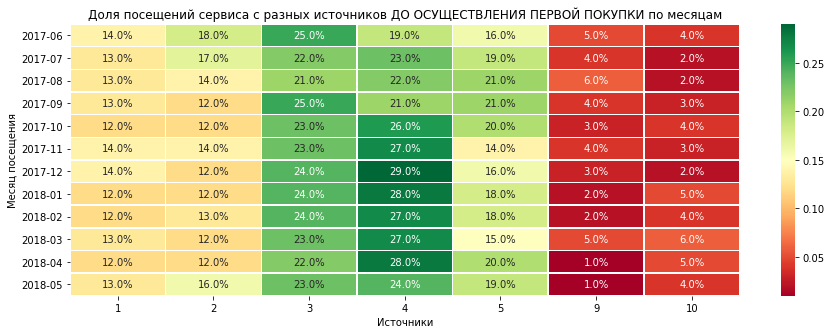

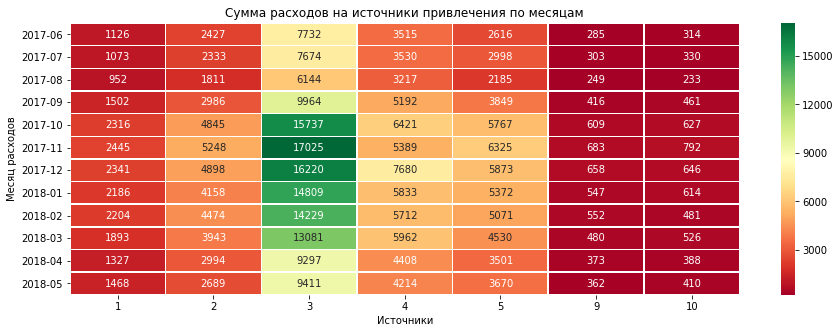

In [50]:
plt.figure(figsize=(15, 5))
plt.title('Доля посещений сервиса с разных источников ДО ОСУЩЕСТВЛЕНИЯ ПЕРВОЙ ПОКУПКИ по месяцам')
sns.heatmap(visits_to_first_purchase_pivot, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц посещения')
plt.show()

costs_pivot = costs_pivot.reset_index()
costs_pivot['cost_month'] = costs_pivot['cost_month'].dt.strftime('%Y-%m')
costs_pivot = costs_pivot.set_index('cost_month')

plt.figure(figsize=(15, 5))
plt.title('Сумма расходов на источники привлечения по месяцам')
sns.heatmap(costs_pivot, annot=True, fmt=".0f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц расходов')
plt.show()

Мы не можем учитывать только источник первого посещения или источник по которому совершили саму покупку
для определения ценности источников, поэтому мы учитываем использование всех источников перехода на сервис,
но в %-ном соотношении, при этом мы не привязываемся к месяцу покупки, так как в нашем расчете мы используем
только те посещения, которые в конечном счете привели к покупке
Можно представить это так:
в месяц 2017-06 - купившие в дальнейшем (может и не в этот месяц) пользователи переходили на сервис именно 
из источника №3 в 25% случаев, конечно же при этом мы понимаем, что до покупки эти пользоватли могли посетить 
сервис не один раз.
Посчитаем стоимость привлечения клиентов из разных источников, учитывая источники ПОКУПКИ (а не первого посещения), а так же посчитаем конверсию по источникам.

In [51]:
uid_first_source = visits_sources_none.groupby('uid').agg({'buy_session':'sum','start_ts':'min','source_id':'first', 'ts_month':'first'})
sources_count = uid_first_source.pivot_table(index = 'ts_month', columns = 'source_id', values = 'buy_session', aggfunc = ['sum', 'count'])

In [52]:
for i in range(1, 11):
    try:
        sources_count[i] = sources_count['sum'][i] / sources_count['count'][i]
    except:
        np.nan
sources_conversion = sources_count[[1, 2, 3, 4, 5, 9, 10]].reset_index()
sources_conversion['ts_month'] = sources_conversion['ts_month'].dt.strftime('%Y-%m')
sources_conversion = sources_conversion.set_index('ts_month')

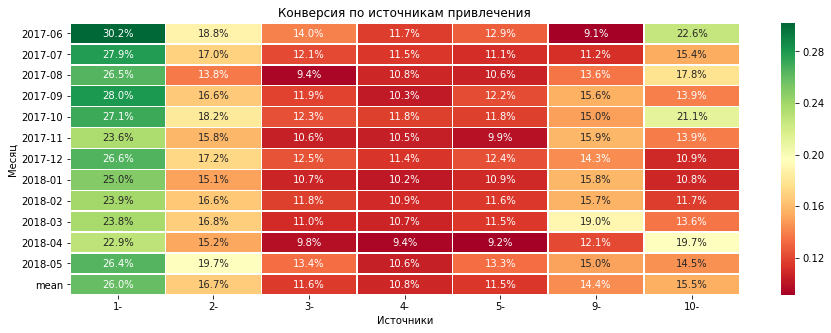

In [53]:
sources_conversion.loc['mean'] = sources_conversion.mean()

plt.figure(figsize=(15, 5))
plt.title('Конверсия по источникам привлечения')
sns.heatmap(sources_conversion, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц')
plt.show()

Наиболее эффективен источник 1 - это видно из конверсии, источник №3 самый не эффективный,
порекомендуем маркетологам вкладываться в источники с наибольшей конверсией - 1, 2, 9, 10

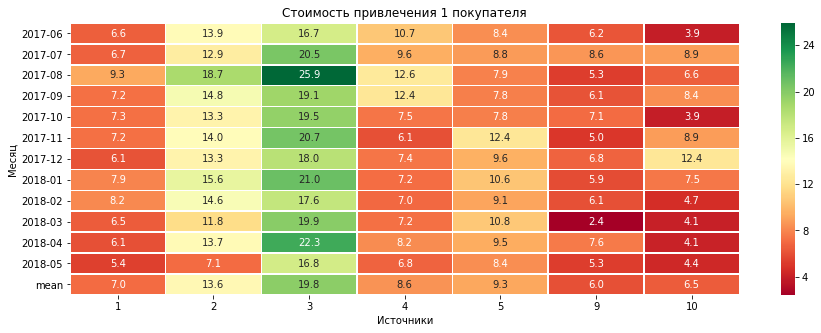

In [54]:
number_purchases = uid_first_source.pivot_table(index = 'ts_month', columns = 'source_id', values = 'buy_session', aggfunc = 'sum')
number_purchases = number_purchases[[1, 2, 3, 4, 5, 9, 10]]

cost_one_buyer_by_sources = pd.DataFrame()
for i in range(1,11):
    try:
        cost_one_buyer_by_sources[i] = costs_pivot[i] / number_purchases[i]
    except:
        continue
cost_one_buyer_by_sources.loc['mean'] = cost_one_buyer_by_sources.mean()
cost_one_buyer_by_sources

plt.figure(figsize=(15, 5))
plt.title('Стоимость привлечения 1 покупателя')
sns.heatmap(cost_one_buyer_by_sources, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц')
plt.show()

Видим, что любимый маркетологами источник №3 самый дорогой, необходимо 
рассмотреть более дешевые источники привлечения - 1, 9, 10, 2 либо работать над конверсией.

<b>На сколько окупились расходы? ROI</b>

In [55]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.set_index('first_buy_month')

In [56]:
costs_by_month = costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').reset_index()
costs_by_month.columns = ['first_buy_month', 'costs']
costs_by_month = costs_by_month.set_index('first_buy_month')

In [57]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(costs_by_month, on = 'first_buy_month')

In [58]:
orders_grouped_by_cohorts_ltv['cac'] = orders_grouped_by_cohorts_ltv['costs'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv[:-1]
orders_grouped_by_cohorts_ltv['romi'] = orders_grouped_by_cohorts_ltv['ltv'] / orders_grouped_by_cohorts_ltv['cac']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.reset_index()

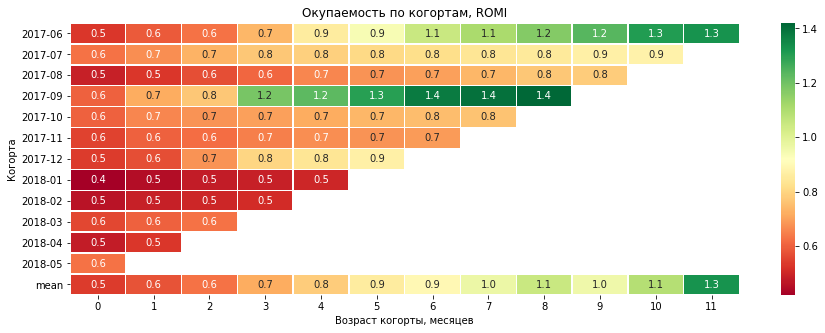

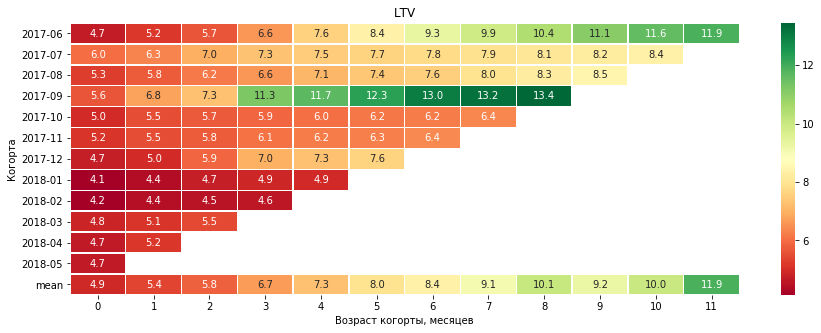

In [59]:
romi = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'romi', aggfunc = 'mean')

romi = romi.cumsum(axis=1)
romi = romi.reset_index()
romi['first_buy_month'] = romi['first_buy_month'].dt.strftime('%Y-%m')
romi = romi.set_index('first_buy_month')
romi.loc['mean'] = romi.mean()
romi = romi.round(2)

plt.figure(figsize=(15, 5))
plt.title('Окупаемость по когортам, ROMI')
sns.heatmap(romi, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

ltv = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'ltv', aggfunc = 'mean')
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv

plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

Затраты на маркетинг окупились лишь в когортах 2017-06 (на 6-ой месяц) и 2017-09 (на 3-ий месяц).
Чтобы стоимость привлечения окупалась уже через полгода, необходимо, чтобы стоимость привлечения 1 клиента не была выше 8$
А для этого мы советуем маркетологам обратить внимание на источники привлечения - 1, 9, 10, а также
поработать над конверсией источников, пока лучшая конверсия у источников 1, 2, 9, 10, благодаря чему по ним лучшая стоимость
привлечения 1 клиента.

Продукт и продажи.

Retention очень низкий. Большинство сессий имеют длительность до 2 минут, т.е. люди заходят на ресурс и, сделав пару щелчков, выходят оттуда. Большая часть клиентов после первой покупки уже не возвращаются. Оставшиеся же совершают в среднем 2 покупки в месяц.
Тем не менее, есть одна когорта, самая первая, которая ведет себя необычно по сравнению со всеми остальными когортами: её Retention заметно выше, чем у остальных когорт (6 процентных пунктов), и совершают больше покупок в месяц (~ 4). Необходимо тщательно исследовать эту когорту: как они узнали о ресурсе, что заставляет их продолжать им пользоваться. Также необходимо сделать опрос клиентов из других когорт, чтобы составить усредненный портрет клиента, который делает намного меньше покупок и котоорый с меньшей вероятностью вернется. Это приблизит нас к пониманию того, какая есть разница в среднем клиенте из 1ой и из любой другой когорты. На основании полученных данных будет возможно разработать определенные мероприятия по повышению лояльности среди клиентов, которые пользуются сайтом лишь однократно.

Также необходимо отметить, что, в том числе, благодаря активной рекламной кампании в период с октября 2017г. по март 2018г. включительно заметно (в 2 раза: с 13000 до 23000 посетителей) повысилась средняя численность одной отдельно взятой когорты в нулевом её месяце. 

Маркетинг.  

Необходимо перераспределить вложения в рекламные каналы и сместить акцент с 3 канала, который особо убыточен для компании, на каналы 1 и 5, которые являются довольно перспективными, учитывая текущую отдачу при текущих вложениях. По 2, 3 и 4 каналам необходимо провести дополнительные исследования и выяснить причины настолько низкой конверсии в покупателя и проработать и провести необходимые мероприятия для исправления ситуации, т.к. в них мы также делаем довольно солидные рекламные вливания. Также стоит обратить внимание на одну из когорт (4ая, сентябрьская) 5го рекламного канала для оценки рекламной кампании того периода, когда эта когорта образовалась, для сравнения её с остальными, менее успешными периодами этих рекламных каналов.